In [115]:
# Import libraries for data analysis
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Read all the data from the csv file
data_checking = pd.read_csv('checkin_checkout_history_updated.csv')
data_gym = pd.read_csv('gym_locations_data.csv')
data_sub = pd.read_csv('subscription_plans.csv')
data_users = pd.read_csv('users_data.csv')

In [117]:
# Merge data_checking with data_users on 'user_id'
data_merged = pd.merge(data_checking, data_users, on='user_id')

# Merge the result with data_gym on 'gym_id'
data_merged = pd.merge(data_merged, data_gym, on='gym_id')

# Merge the result with data_sub on 'subscription_plan'
data_final = pd.merge(data_merged, data_sub, on='subscription_plan')

# Display the information of the resulting dataframe
data_final.info()

# Display the first 5 rows of the resulting dataframe
data_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            300000 non-null  object 
 1   gym_id             300000 non-null  object 
 2   checkin_time       300000 non-null  object 
 3   checkout_time      300000 non-null  object 
 4   workout_type       300000 non-null  object 
 5   calories_burned    300000 non-null  int64  
 6   first_name         300000 non-null  object 
 7   last_name          300000 non-null  object 
 8   age                300000 non-null  int64  
 9   gender             300000 non-null  object 
 10  birthdate          300000 non-null  object 
 11  sign_up_date       300000 non-null  object 
 12  user_location      300000 non-null  object 
 13  subscription_plan  300000 non-null  object 
 14  location           300000 non-null  object 
 15  gym_type           300000 non-null  object 
 16  fa

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,location,gym_type,facilities,price_per_month,features
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce..."
1,user_3291,gym_6,2023-09-09 08:12:00,2023-09-09 09:55:00,Weightlifting,850,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce..."
2,user_3291,gym_6,2023-07-23 19:58:00,2023-07-23 22:12:00,Cardio,1089,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce..."
3,user_3291,gym_6,2023-02-17 12:45:00,2023-02-17 15:20:00,CrossFit,1641,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce..."
4,user_3291,gym_6,2023-10-05 07:05:00,2023-10-05 09:11:00,CrossFit,228,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce..."


In [118]:
# Convert 'checkout_time' and 'checkin_time' columns to datetime
data_final['checkout_time'] = pd.to_datetime(data_final['checkout_time'])
data_final['checkin_time'] = pd.to_datetime(data_final['checkin_time'])

# Add a new column "time spent" to the dataframe
data_final['time_spent'] = data_final['checkout_time'] - data_final['checkin_time']

# Format "time spent" to show only hours, minutes, and seconds
data_final['time_spent'] = data_final['time_spent'].apply(lambda x: str(x).split(' ')[-1])

# Display the first 5 rows of the resulting dataframe
data_final.head()

,user_id,gym_id,checkin_time,checkout_time,workout_type,calories_burned,first_name,last_name,age,gender,birthdate,sign_up_date,user_location,subscription_plan,location,gym_type,facilities,price_per_month,features,time_spent
0,user_3291,gym_6,2023-09-10 15:55:00,2023-09-10 16:34:00,Weightlifting,462,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce...",00:39:00
1,user_3291,gym_6,2023-09-09 08:12:00,2023-09-09 09:55:00,Weightlifting,850,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce...",01:43:00
2,user_3291,gym_6,2023-07-23 19:58:00,2023-07-23 22:12:00,Cardio,1089,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce...",02:14:00
3,user_3291,gym_6,2023-02-17 12:45:00,2023-02-17 15:20:00,CrossFit,1641,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce...",02:35:00
4,user_3291,gym_6,2023-10-05 07:05:00,2023-10-05 09:11:00,CrossFit,228,Michael,Rodriguez,41,Female,1998-03-10,2023-04-08,Atlanta,Pro,Philadelphia,Budget,"Swimming Pool, Climbing Wall, Sauna",49.99,"Access to all facilities, Unlimited class acce...",02:06:00


In [119]:
# Convert 'checkin_time' and 'sign_up_date' columns to datetime
data_final['checkin_time'] = pd.to_datetime(data_final['checkin_time'])
data_final['sign_up_date'] = pd.to_datetime(data_final['sign_up_date'])

# Calculate the retention date (180 days after sign-up date)
data_final['retention_date'] = data_final['sign_up_date'] + pd.Timedelta(days=180)

# Determine if the user has checked in within 30 days of sign-up
data_final['retained'] = data_final.apply(lambda row: row['checkin_time'] <= row['retention_date'], axis=1)

# Group by user_id to check if they have at least one check-in within 30 days
user_retention = data_final.groupby('user_id')['retained'].any().reset_index()

# Calculate the retention rate
retention_rate = user_retention['retained'].mean()

print(f"30-day user retention rate: {retention_rate:.2%}")

30-day user retention rate: 45.70%


In [120]:
# Convert 'checkin_time' and 'sign_up_date' columns to datetime
data_final['checkin_time'] = pd.to_datetime(data_final['checkin_time'])
data_final['sign_up_date'] = pd.to_datetime(data_final['sign_up_date'])

# Calculate the retention date (180 days after sign-up date)
data_final['retention_date'] = data_final['sign_up_date'] + pd.Timedelta(days=180)

# Determine if the user has checked in within 30 days of sign-up
data_final['retained'] = data_final.apply(lambda row: row['checkin_time'] <= row['retention_date'], axis=1)

# Group by user_id to check if they have at least one check-in within 30 days
user_retention = data_final.groupby('user_id')['retained'].any().reset_index()

# Merge the retention information back to the original dataframe
data_final = pd.merge(data_final, user_retention, on='user_id', suffixes=('', '_overall'))

# Rename the 'retained_overall' column to 'retention'
data_final.rename(columns={'retained_overall': 'retention'}, inplace=True)

# Drop the temporary 'retained' and 'retention_date' columns
data_final.drop(columns=['retained', 'retention_date'], inplace=True)

# Display the first 5 rows of the resulting dataframe
data_final.head()

# Display the information of the resulting dataframe
data_final.info()

# Save the final dataframe to a new csv file
data_final.to_csv('data_final.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            300000 non-null  object        
 1   gym_id             300000 non-null  object        
 2   checkin_time       300000 non-null  datetime64[ns]
 3   checkout_time      300000 non-null  datetime64[ns]
 4   workout_type       300000 non-null  object        
 5   calories_burned    300000 non-null  int64         
 6   first_name         300000 non-null  object        
 7   last_name          300000 non-null  object        
 8   age                300000 non-null  int64         
 9   gender             300000 non-null  object        
 10  birthdate          300000 non-null  object        
 11  sign_up_date       300000 non-null  datetime64[ns]
 12  user_location      300000 non-null  object        
 13  subscription_plan  300000 non-null  object  

In [121]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [122]:
# Check which categorical features exist in the dataframe
categorical_features = ['gender', 'workout_type', 'gym_type', 'user_location']
existing_categorical_features = [feature for feature in categorical_features if feature in data_final.columns]

# Convert existing categorical features to numerical using one-hot encoding
if existing_categorical_features:
	data_final = pd.get_dummies(data_final, columns=existing_categorical_features, drop_first=True)
else:
	print("No categorical features found in the dataframe.")

In [123]:
# Convert 'time spent' to total seconds
data_final['time_spent'] = pd.to_timedelta(data_final['time_spent']).dt.total_seconds()

# Select features and target variable again after conversion
features = ['age', 'calories_burned', 'price_per_month', 'time_spent'] + \
		   [col for col in data_final.columns if col.startswith(('gender_', 'workout_type_', 'gym_type_', 'user_location_'))]
X = data_final[features]
y = data_final['retention']

# Split the data into training and testing sets again after conversion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [126]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7253
Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.78      0.76     32651
        True       0.72      0.66      0.69     27349

    accuracy                           0.73     60000
   macro avg       0.72      0.72      0.72     60000
weighted avg       0.72      0.73      0.72     60000



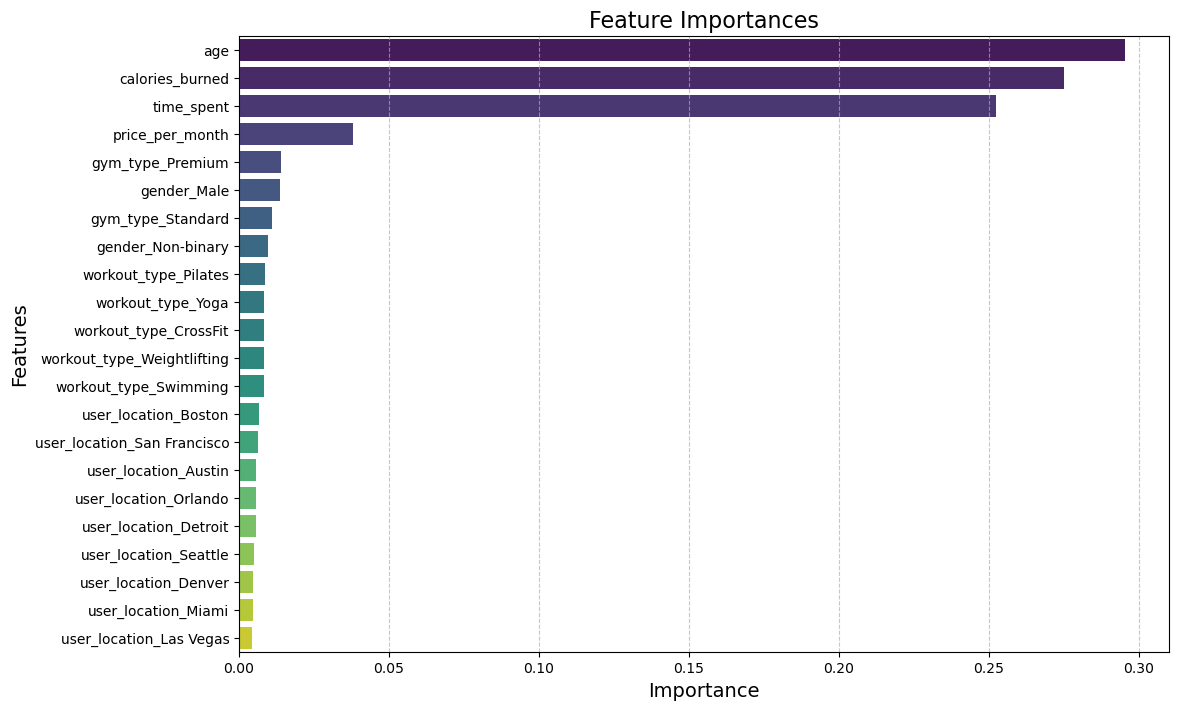

In [127]:
# Display feature importances with improved visualization
feature_importances = pd.Series(model.feature_importances_, index=features)
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_importances.index, palette='viridis')
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [128]:
# Save the trained model and scaler
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']